<a href="https://colab.research.google.com/github/034adarsh/Exam_Based_Admission_Predictor/blob/main/Exam_Based_Admission_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exam Based Admission Prediction Model

---



Step-1: Import the required libraries 

In [18]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

Step-2: Loading the dataset

In [19]:
data = pd.read_csv('SetD_dataset.csv')
data.head()

,paper1,paper2,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Step-3: Visualization of the dataset

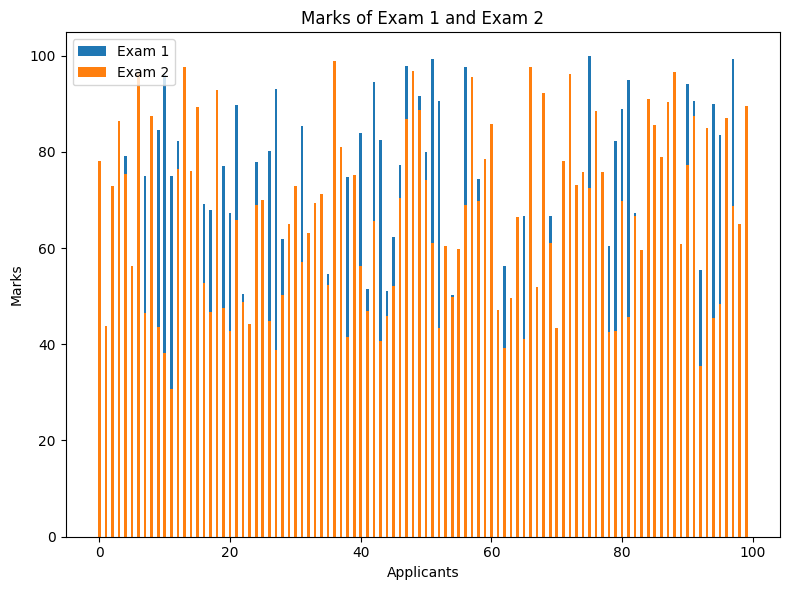

In [30]:
# Extract the exam scores
exam1_scores = data['paper1']
exam2_scores = data['paper2']

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(range(len(exam1_scores)), exam1_scores, width=0.4, label='Exam 1')
ax.bar(range(len(exam2_scores)), exam2_scores, width=0.4, label='Exam 2')

# Adding labels and title
ax.set_xlabel('Applicants')
ax.set_ylabel('Marks')
ax.set_title('Marks of Exam 1 and Exam 2')

# Adding legend and adjusting the layout
ax.legend()
plt.tight_layout()

# Display 

In [34]:
fig = px.sunburst(data,
                  path = ['paper1', 'paper2'],
                  color = 'admission', title = 'Sunburst Chart of the dataset')
fig.show()

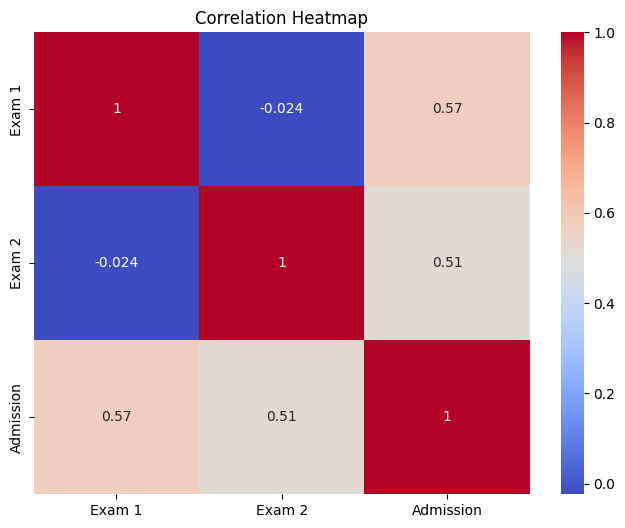

In [35]:
exam1_scores = data['paper1']
exam2_scores = data['paper2']
admission = data['admission']

# Create a DataFrame with the exam scores and admission decisions
df = pd.DataFrame({'Exam 1': exam1_scores, 'Exam 2': exam2_scores, 'Admission': admission})

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Step-4: Splitting the data into features (exam scores) and target (admissions decision)

In [21]:
X = data[['paper1', 'paper2']]  # Features
y = data['admission']  # Target

Step-5: Split the data into training and testing sets 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step-6: Create an instance of the logistic regression model

In [23]:
model = LogisticRegression()

Step-7: Train the model on the training data

In [24]:
model.fit(X_train, y_train)

LogisticRegression()

Step-8: Make predictions on the testing data

In [25]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1]


Step-9: Compute the confusion matrix

In [36]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[7 1]
 [3 9]]


Step-10: Plotting the confusion matrix

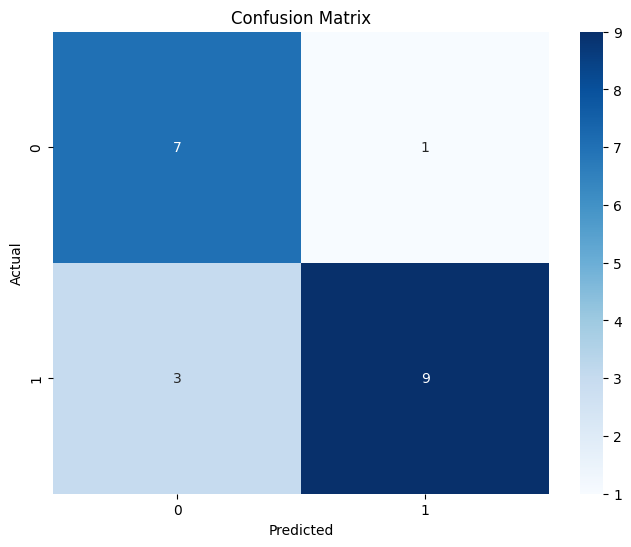

In [27]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Step-9: Compute the accuracy of the model

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8
